In [1]:
#Cargar las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer el Dataframe
seatsdf = pd.read_csv(r'C:\Users\flore\OneDrive\Documents\Proyecto Final Clonado\ProyectoIntegradorDAFT08\Data\Data Original\seats.csv')


In [3]:
# Mostrar los tipos de datos de las columnas
print("Tipos de datos para la tabla 'seatsdf':")
print(seatsdf.dtypes)

Tipos de datos para la tabla 'seatsdf':
aircraft_code      object
seat_no            object
fare_conditions    object
dtype: object


In [4]:
np.shape(seatsdf)


(1339, 3)

In [5]:
# Mostrar las primeras filas
seatsdf.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [6]:
# Comprobar valores nulos
print(seatsdf.isnull().sum())

aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64


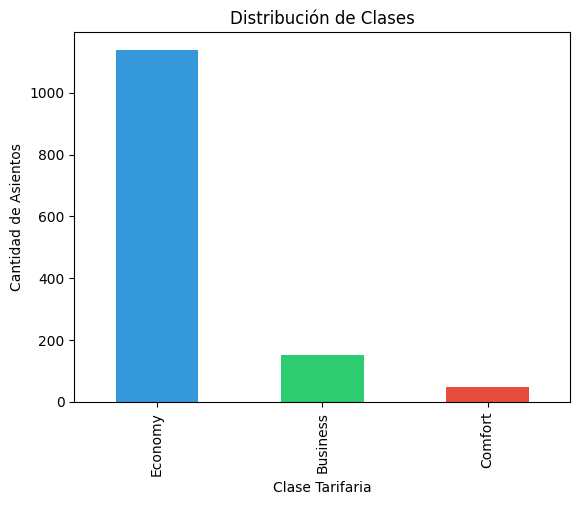

In [7]:
# Conteo por clase
fare_counts = seatsdf['fare_conditions'].value_counts()

# Gráfico
fare_counts.plot(kind='bar', color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Distribución de Clases')
plt.xlabel('Clase Tarifaria')
plt.ylabel('Cantidad de Asientos')
plt.show()

 La clase Economy presenta la mayor cantidad de asientos disponibles, lo que indica que es la clase más común o popular en el vuelo.

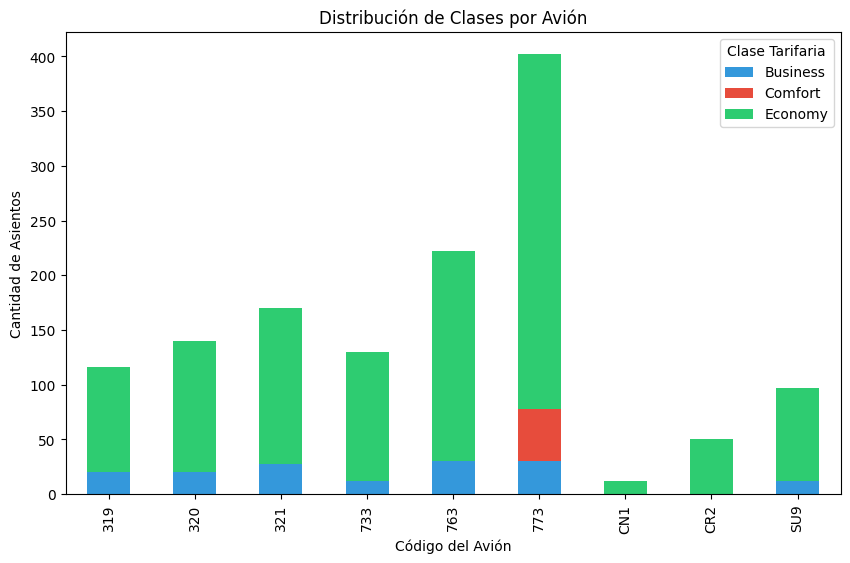

In [8]:
# Tabla cruzada de aircraft_code y fare_conditions
aircraft_fare = seatsdf.pivot_table(index='aircraft_code', columns='fare_conditions', aggfunc='size', fill_value=0)

# Gráfico apilado
aircraft_fare.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Distribución de Clases por Avión')
plt.xlabel('Código del Avión')
plt.ylabel('Cantidad de Asientos')
plt.legend(title='Clase Tarifaria')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\flore\AppData\Local\Temp\ipykernel_10200\2661236118.py:2: SyntaxWarning: invalid escape sequence '\d'
  seatsdf['seat_row'] = seatsdf['seat_no'].str.extract('(\d+)').astype(int)  # Solo números


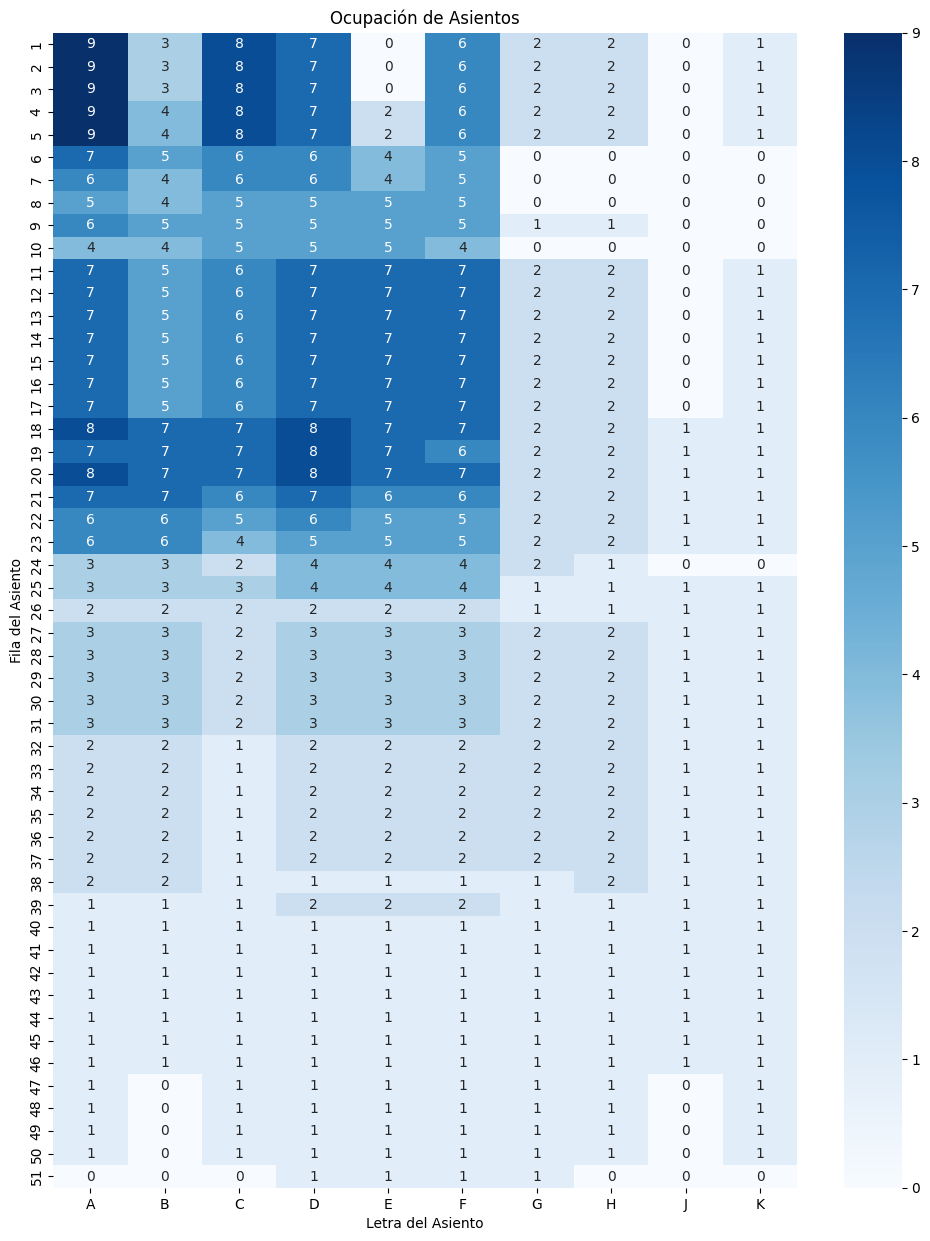

In [18]:
# Dividir asiento en fila y columna
seatsdf['seat_row'] = seatsdf['seat_no'].str.extract('(\d+)').astype(int)  # Solo números
seatsdf['seat_letter'] = seatsdf['seat_no'].str.extract('([A-Z])')  # Solo letras

# Crear tabla cruzada para el heatmap
heatmap_data = seatsdf.pivot_table(index='seat_row', columns='seat_letter', aggfunc='size', fill_value=0)

# Dibujar el heatmap
plt.figure(figsize=(12,15))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt="d")
plt.title('Ocupación de Asientos')
plt.xlabel('Letra del Asiento')
plt.ylabel('Fila del Asiento')
plt.show()


El mapa de calor representará visualmente la distribución de la ocupación de los asientos en los diferentes asientos del avión. Las celdas de color azul más oscuro indican una mayor cantidad de pasajeros que ocupan esos asientos en particular, mientras que los colores más claros representan menos pasajeros o asientos vacíos.

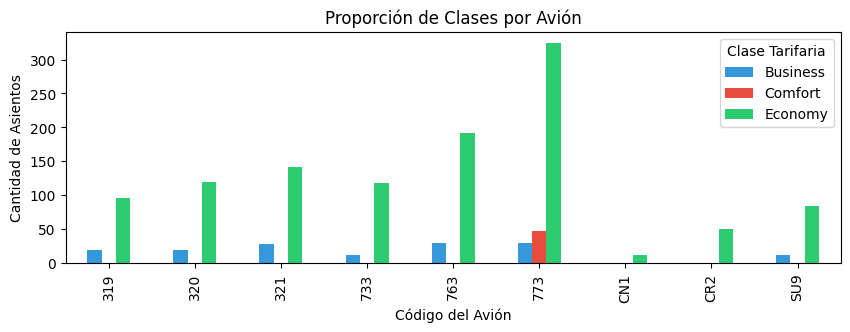

In [14]:
# Agrupar y contar
grouped = seatsdf.groupby(['aircraft_code', 'fare_conditions']).size().unstack()

# Gráfico de barras agrupadas
grouped.plot(kind='bar', figsize=(10, 3), color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Proporción de Clases por Avión')
plt.xlabel('Código del Avión')
plt.ylabel('Cantidad de Asientos')
plt.legend(title='Clase Tarifaria')
plt.show()


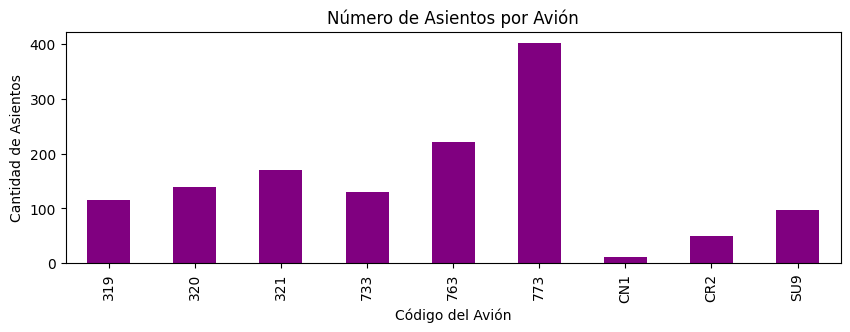

In [13]:
# Contar asientos por avión
seat_counts = seatsdf.groupby('aircraft_code')['seat_no'].count()

# Gráfico
seat_counts.plot(kind='bar', color='purple', figsize=(10, 3))
plt.title('Número de Asientos por Avión')
plt.xlabel('Código del Avión')
plt.ylabel('Cantidad de Asientos')
plt.show()


Algunos modelos tienen una capacidad significativamente mayor que otros.